In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# download a special convenient tool for splitting a dataset:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [2]:
# the most famous python module for Natural Language Processing techniques
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
# always fix RANDOM_SEED so that your experiments are reproducible
RANDOM_SEED = 42

In [4]:
# fix the version of the packages so that the experiments are reproducible
!pip freeze > requirements.txt

In [5]:
# download our data from the competition

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [7]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [10]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [12]:
# IMPORTANT! for correct processing of features, we combine the train and the test into one dataset
df_train['sample'] = 1 # mark train dataset
df_test['sample'] = 0 # mark test dataset
df_test['reviewer_score'] = 0 # in the test df, we do not have the value of reviewer_score
# we must predict it, so for now we just fill it with zeros

data = df_test.append(df_train, sort=False).reset_index(drop=True) # unite

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [14]:
data['lat'] = data['lat'].fillna(0, inplace=True)
data['lng'] = data['lng'].fillna(0, inplace=True)

In [15]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                                1
lng                                                1
sample                                             2
reviewer_score                                    38
dtype: int64

In [16]:
data.head(5)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,None,None,0,0.0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,None,None,0,0.0
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,None,None,0,0.0
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,None,None,0,0.0
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,None,None,0,0.0


In [17]:
# We will extract the name of the city for further One-Hot Encoding.
data['hotel_country'] = data['hotel_address'].str.split().str[-2]
data['hotel_country'].value_counts()

United       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: hotel_country, dtype: int64

In [18]:
city = ['London','Barcelona','Paris', 'Amsterdam', 'Vienna', 'Milan']

pat = '({})'.format('|'.join([r'\b{}\b'.format(x) for x in city]))

data['hotel_city'] = data['hotel_address'].str.extract(pat, expand=True)

In [19]:
data['hotel_city'].value_counts()

London       262301
Barcelona     60149
Paris         59706
Amsterdam     57436
Vienna        38939
Milan         37207
Name: hotel_city, dtype: int64

In [20]:
# There is comlete function for One-Hot Encoding in pandas  - get_dummies.
data = pd.get_dummies(data, columns=['hotel_city'], prefix='', prefix_sep='',dummy_na=False)

In [21]:
# We will define the season when the review was made for further for One-Hot Encoding.
data['review_date'] = pd.to_datetime(data['review_date'])
data['month'] = data['review_date'].dt.month

In [22]:
def season_category(m):
    if 1 <= m <= 2:
        return "winter"
    if 3 <= m <= 5:
        return "spring"
    if 6 <= m <= 8:
        return "summer"
    if 9 <= m <= 11:
        return "autumn"
    if m == 12:
        return "winter"
    
data['month'] = data['month'].apply(lambda m:season_category(m)) 

In [23]:
data = pd.get_dummies(data, columns=['month'], prefix='', prefix_sep='',dummy_na=False)

In [24]:
# We can not use this type in ML.
data = data.drop(['review_date'], axis = 1)

In [25]:
# Convert strings to lists in columns 'tags'.
data['tags'] = data['tags'].apply(lambda x: eval(x))

In [26]:
# All tag's list
tag_list = np.sort(data.tags.explode().unique())
tag_list

array([' 1 King Bed Guest Room ', ' 2 Adjacent Non Communicating Rooms ',
       ' 2 Adjacent Rooms ', ..., ' penta Plus Room ',
       ' penta Standard Room ',
       ' superior Double or Twin Room with extra bed '], dtype=object)

In [27]:
# Define TOP tags.
top_tags = list(data.tags.explode().value_counts().index)[:10]
top_tags

[' Leisure trip ',
 ' Submitted from a mobile device ',
 ' Couple ',
 ' Stayed 1 night ',
 ' Stayed 2 nights ',
 ' Solo traveler ',
 ' Stayed 3 nights ',
 ' Business trip ',
 ' Group ',
 ' Family with young children ']

In [28]:
# Get One-Hot for top tags.

for t in top_tags:
    data[t] = data.tags.apply(lambda x: 1 if t in x else 0)

data = data.drop(['tags'], axis=1)
data.head(2)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,...,Leisure trip,Submitted from a mobile device,Couple,Stayed 1 night,Stayed 2 nights,Solo traveler,Stayed 3 nights,Business trip,Group,Family with young children
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,...,1,0,1,0,1,0,0,0,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,...,1,0,0,1,0,0,0,0,1,0


In [29]:
# Transformation of 'days_since_review' to ML-friendly feature.
regex = '[0-9]+'
data['review_update'] = data['days_since_review'].str.findall(regex).str.get(0)
data['review_update'] = data['review_update'].astype('int64')

In [30]:
# Each textual reviews is splitted into a positive part and a negative part. 
# We'll group them together in order to start with only raw text data and no other information.
data['review'] = data['negative_review'] + data['positive_review']

In [31]:
# Remove 'No Negative' or 'No Positive' from text.
data['review'] = data['review'].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [32]:
# add number of characters column
data['nb_chars'] = data['review'].apply(lambda x: len(x))

# add number of words column
data['nb_words'] = data['review'].apply(lambda x: len(x.split(" ")))

In [33]:
# add sentiment anaylsis columns

analyzer = SentimentIntensityAnalyzer()
data['neg'] = data['review'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
data['neu'] = data['review'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
data['pos'] = data['review'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
data['compound'] = data['review'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:

* a neutrality score
* a positivity score
* a negativity score
* an overall score that summarizes the previous scores.

We will integrate those 4 values as features in our dataset.

<AxesSubplot:>

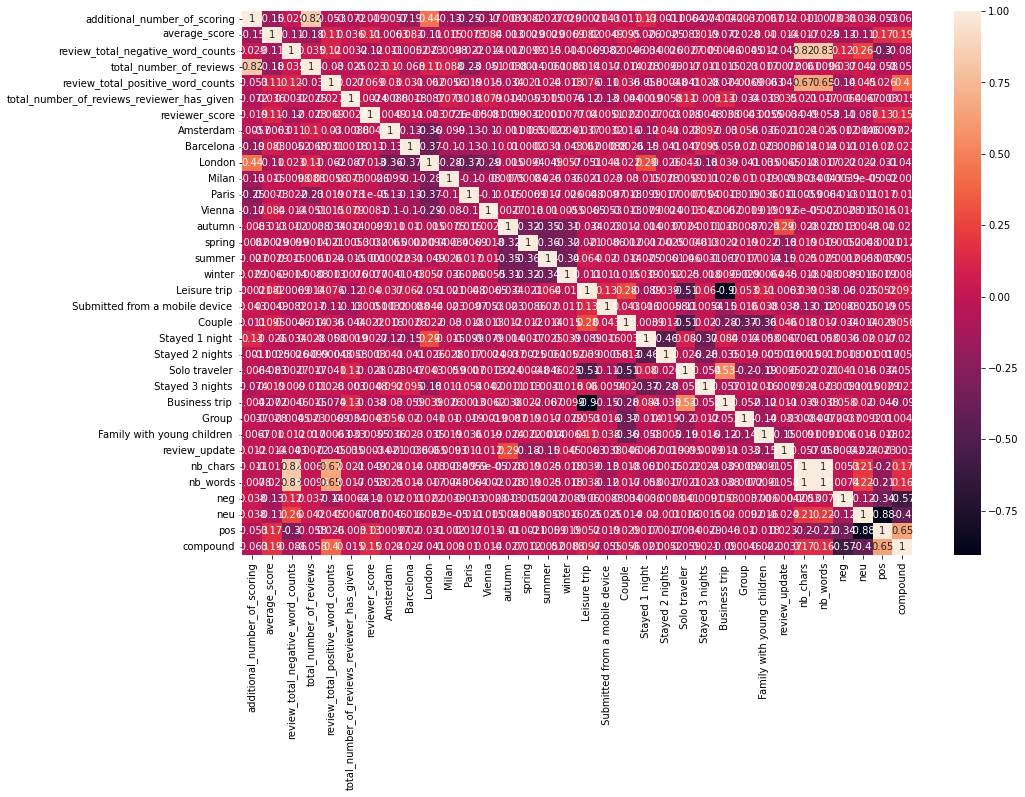

In [34]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [35]:
# the model based on features with dtypes "object" will not be trained, just select them and drop them
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [36]:
# drop the most highly correlated features
data.drop(['total_number_of_reviews', ' Leisure trip ', 'neu'], axis=1, inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 32 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   review_total_positive_word_counts           515738 non-null  int64  
 4   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 5   sample                                      515738 non-null  int64  
 6   reviewer_score                              515738 non-null  float64
 7   Amsterdam                                   515738 non-null  uint8  
 8   Barcelona                                   515738 non-null  uint8  
 9   London                                      515738 non-null  uint8  
 

In [38]:
# Continuous variables
num_cols = ['additional_number_of_scoring', 'review_total_negative_word_counts',
       'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given',
       'review_update', 'neg', 'pos', 'compound']

# Categorical variables
cat_cols = ['average_score', 'Amsterdam', 'Barcelona', 'London', 'Milan', 'Paris',
       'Vienna', 'autumn', 'spring', 'summer', 'winter',
       ' Submitted from a mobile device ', ' Couple ', ' Stayed 1 night ',
       ' Stayed 2 nights ', ' Solo traveler ', ' Stayed 3 nights ',
       ' Business trip ', ' Group ', ' Family with young children ',]

In [39]:
# now select the test part
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [40]:
# let's use the special function train_test_split to split the test data
# select 20% of the data for validation (parameter test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [41]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 31), (386803, 31), (386803, 30), (309442, 30), (77361, 30))

<AxesSubplot:>

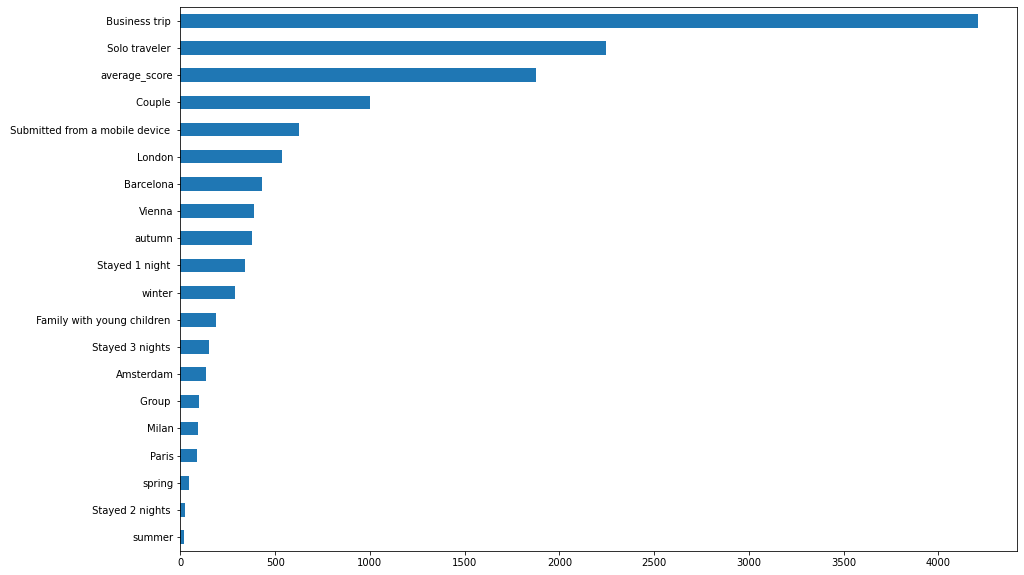

In [42]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # chi-square

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

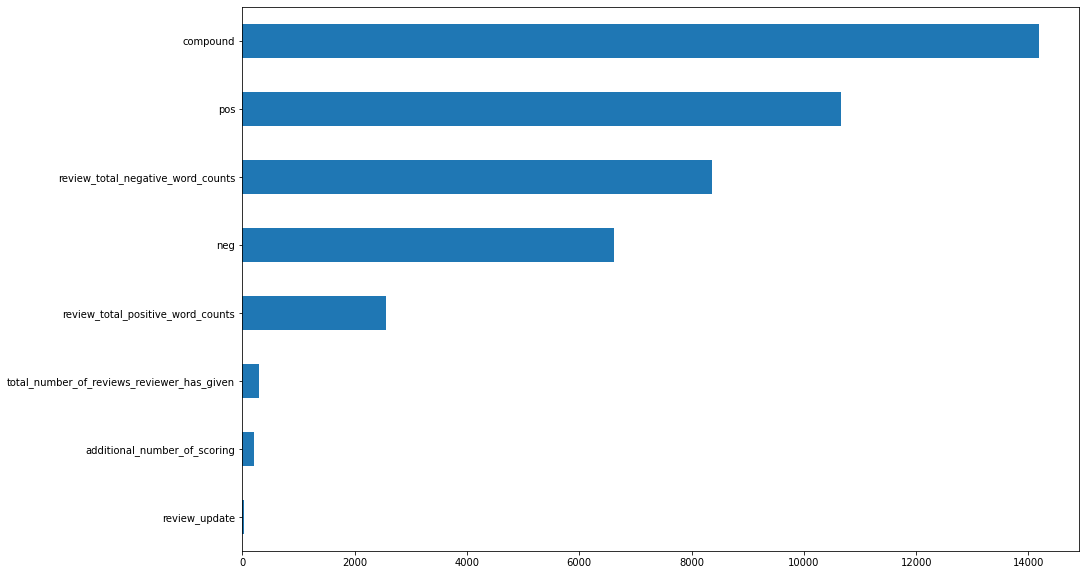

In [43]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [44]:
# import the required libraries
from sklearn.ensemble import RandomForestRegressor # model creation and training tool
from sklearn import metrics # tools for evaluating model accuracy

In [45]:
# create a model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [46]:
# train the model on the test dataset
model.fit(X_train, y_train)

# we use the trained model to predict the rating of hotels in the test set.
# the predicted values are written to the variable y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


In [47]:
# we write our own function Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [48]:
# compare the predicted values (y_pred) with the real ones (y_test), and see how they differ on average
# the metric is called Mean Absolute Error (MAE) and shows the average deviation of the predicted values from the actual ones
print('MAЕ:', metrics.mean_absolute_error(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MAЕ: 0.8870824704954687
MAPE: 12.670350593187147


<AxesSubplot:>

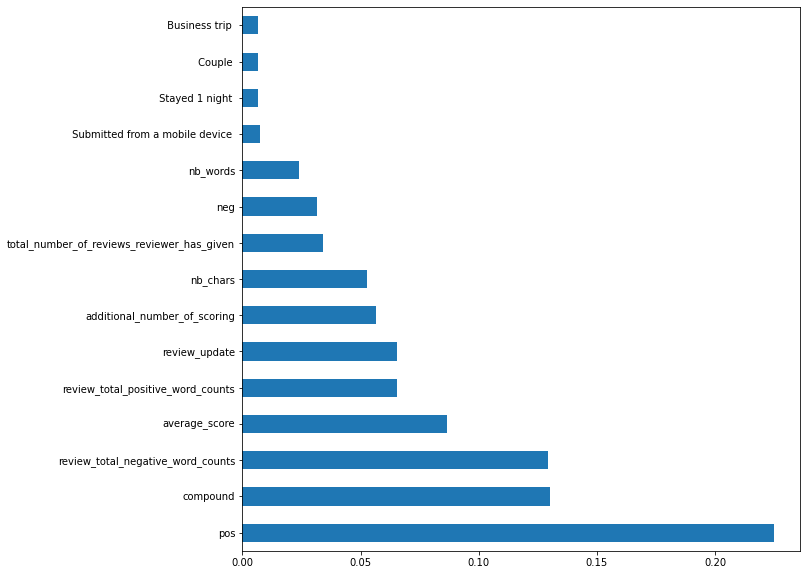

In [49]:
# it is possible to display in RandomForestRegressor the most important features for the model
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [50]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,Amsterdam,Barcelona,London,Milan,...,Stayed 3 nights,Business trip,Group,Family with young children,review_update,nb_chars,nb_words,neg,pos,compound
21241,694,8.7,0,10,2,0.0,0,0,1,0,...,0,1,1,0,653,46,10,0.000,0.636,0.8880
122226,522,8.8,7,5,1,0.0,0,0,1,0,...,0,0,0,0,276,62,11,0.000,0.000,0.0000
21287,1058,7.7,0,5,2,0.0,0,0,1,0,...,0,0,0,0,243,28,5,0.000,0.000,0.0000
24537,185,8.0,64,6,84,0.0,0,0,0,0,...,0,0,0,0,546,395,69,0.092,0.083,0.0790
29702,249,7.7,17,14,8,0.0,0,0,1,0,...,1,0,1,0,370,138,30,0.184,0.117,-0.2732
5539,301,8.8,3,9,3,0.0,0,0,1,0,...,0,0,0,0,483,75,11,0.000,0.613,0.9022
21504,1471,9.1,4,2,7,0.0,0,0,1,0,...,0,1,0,0,547,24,5,0.000,0.000,0.0000
128655,69,9.1,0,14,7,0.0,0,0,0,0,...,0,0,0,0,318,62,14,0.000,0.262,0.5994
29650,434,8.6,0,28,8,0.0,0,1,0,0,...,1,0,1,0,676,160,28,0.000,0.382,0.9273
11890,379,8.9,2,3,2,0.0,0,0,0,1,...,1,0,0,0,716,20,4,0.000,0.000,0.0000


In [51]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [52]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [53]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.9s finished


In [54]:
predict_submission

array([8.89 , 7.536, 8.294, ..., 8.2  , 9.642, 7.009])

In [55]:
list(sample_submission)

['reviewer_score', 'id']

In [56]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.890,488440
1,7.536,274649
2,8.294,374688
3,9.599,404352
4,9.530,451596
5,8.228,302161
6,7.416,317079
7,7.961,13963
8,8.508,159785
9,7.613,195089
